# Análise Exploratória dos Dados

In [1]:
# importando bibliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('..\\data\\raw\\winequalityN.csv')

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Entendendo as Variáveis


- **type:** tipo do vinho (vermelho ou branco)
- **fixed acidity:** a maioria dos ácidos envolvidos no vinho são fixos ou não voláteis (não evaporam facilmente)
- **volatile acidity:** a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
- **citric acid:** encontrado em pequenas quantidades, o ácido cítrico pode adicionar 'frescor' e sabor aos vinhos
- **residual sugar:** a quantidade de açúcar restante após a parada da fermentação, é raro encontrar vinhos com menos de 1 grama/litro e
- **chlorides:** a quantidade de sal no vinho
- **free sulfur dioxide:** a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como um gás dissolvido) e o íon bissulfito; previne
- **total sulfur dioxide:** quantidade de formas livres e ligadas de SO2; em baixas concentrações, o SO2 é quase indetectável no vinho, mas em SO2 livre
- **density:** a densidade da água é próxima à da água dependendo do teor percentual de álcool e açúcar
- **pH:** descreve o quão ácido ou básico um vinho é em uma escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala
- **sulphates:** um aditivo de vinho que pode contribuir para os níveis de gás dióxido de enxofre (S02), que atua como um antimicrobiano
- **alcohol:** o teor percentual de álcool do vinho (%)
- **quality:** variável de saída (com base em dados sensoriais, pontuação entre 0 e 10)

Com exceção do alcool que é medido sua porcentagem, os demais componentes são representados em g/mL (gramas por mililitro)

#### Limpeza nos Dados

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Os tipos de dados estão corretos conforme o desejado, não será necessário transformação de caracteres.

In [5]:
# soma a quantidade de valores nulos por coluna
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Notamos valores ausentes no conjunto de dados. Uma forma de resolver este problema seria fazer a substituição desses valores para não haver perca de dados, porém a quantidade de valores é muito pequena se comparada ao tamanho do dataset e por conta disso tomarei libertade em remover estes dados nulos, visto que tal remoção possa ter um impacto insignificativo no projeto. Entretanto, caso nosso modelo  de classificação apresente um desempenho abaixo do esperado, podemos voltar atrás de testar se esses dados trarão alguma melhora no desempenho.

In [6]:
# remove dados nulos
data = data.dropna()

In [7]:
# soma a quantidade de dados duplicados
data.duplicated().sum()

1168

No caso de dados duplicados não tem muito o que se fazer a não ser remove-los. Dados duplicados atrapalham e podem enviesar nossa análise e nosso modelo.

In [8]:
# remove dados duplicados
data = data.drop_duplicates()

#### Distribuição dos Dados

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.880005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


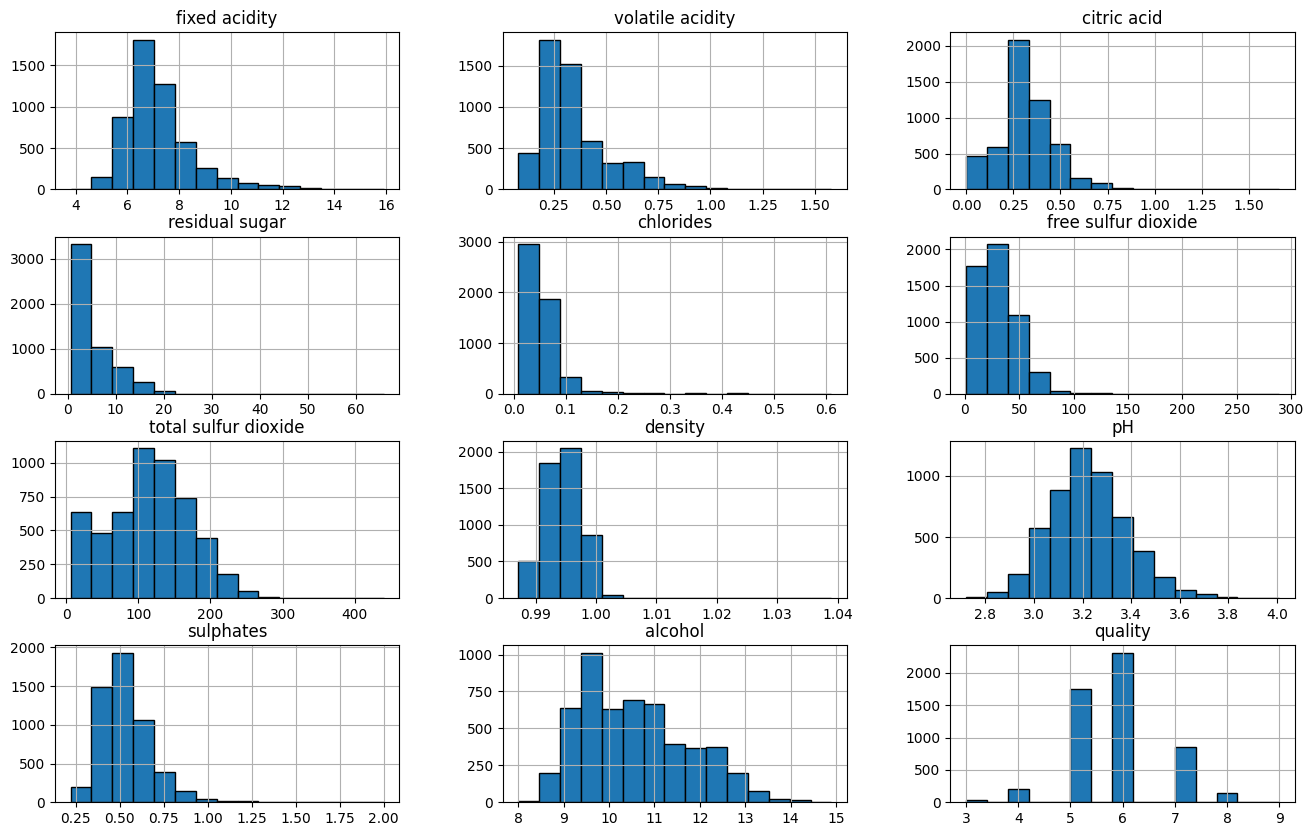

In [10]:
# cria histograma
data.hist(figsize=(16,10), bins=15, edgecolor='black');

Analisando estas distribuições, podemos observar que a maioria das variáveis apresentam uma cauda longa à direita, isso nos mostra que possívelmente haverá outliers presentes nos dados, e que se for o caso, teremos que remove-los pois modelos de classificação são muitas vezes senssíveis à dados extremos.

O ideal é tratar-mos estas variáveis até ficarem próxima de uma normal (ou forma de sino).

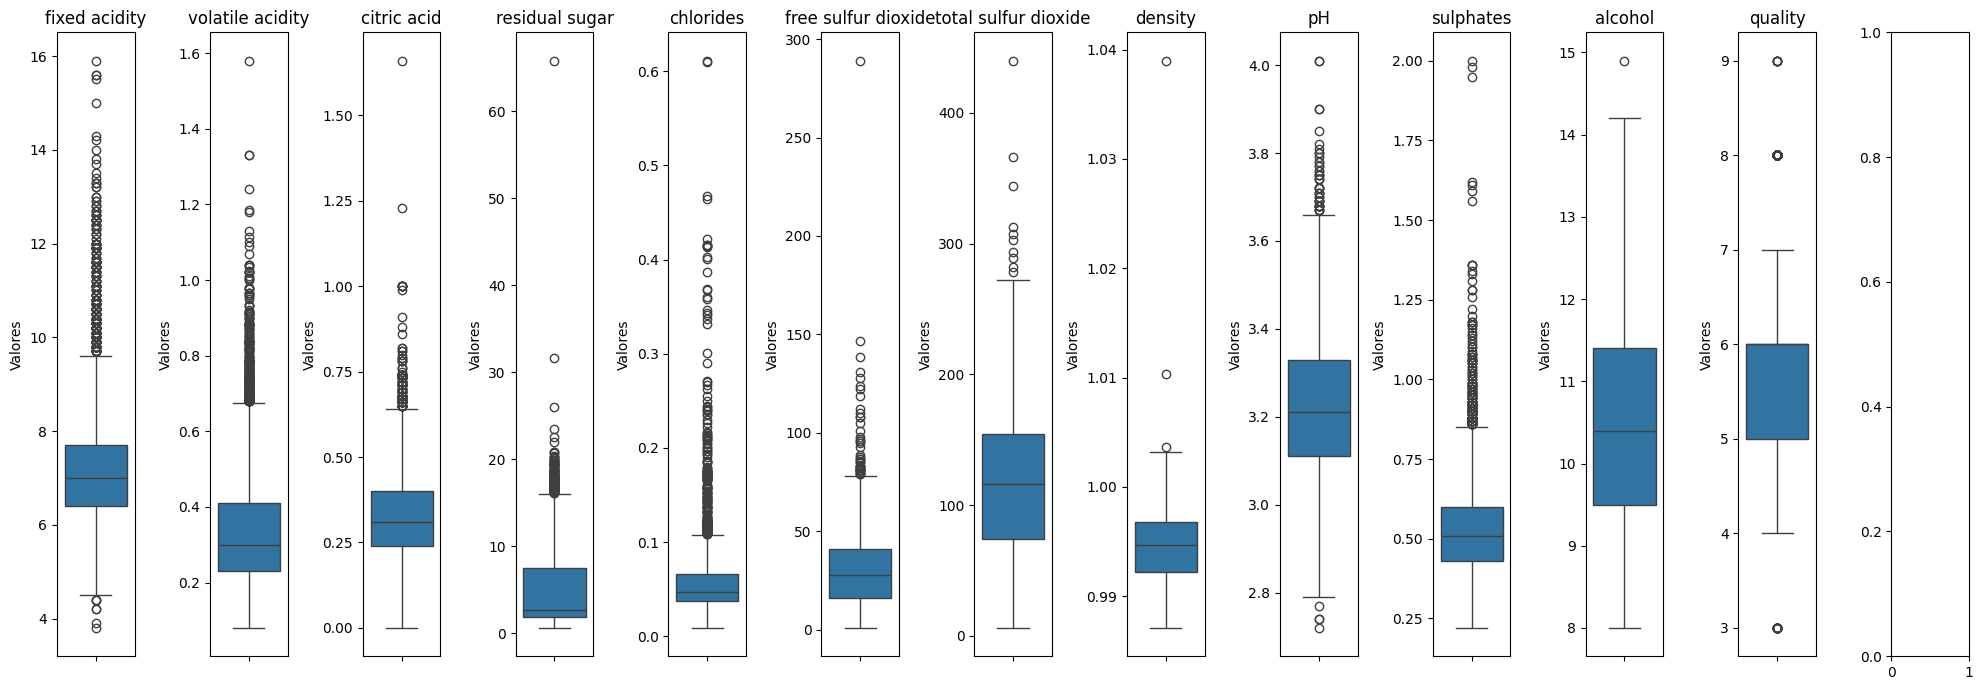

In [18]:
# seleciona as colunas que serão plotadas
col_plot = [col for col in data.columns if col not in ['type']]

# cria boxplot para cada coluna
n_cols = len(data.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(20,7))

for i, coluna in enumerate(col_plot):
    sns.boxplot(data=data, y=coluna, ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Valores')
    
plt.tight_layout()
plt.show()

Notamos que de fato há sim outlies nos dados, e que isso trará problemas futuros ao nosso modelo de machine learning, por conta disso teremos que remove-los ou trata-los, mas antes de disso vamos buscar entender melhor esses dados e fazer uma análise com as duas classes de vinho para entender se esse comportamento é devido há um tipo específico ou ocorre com os dois tipos.

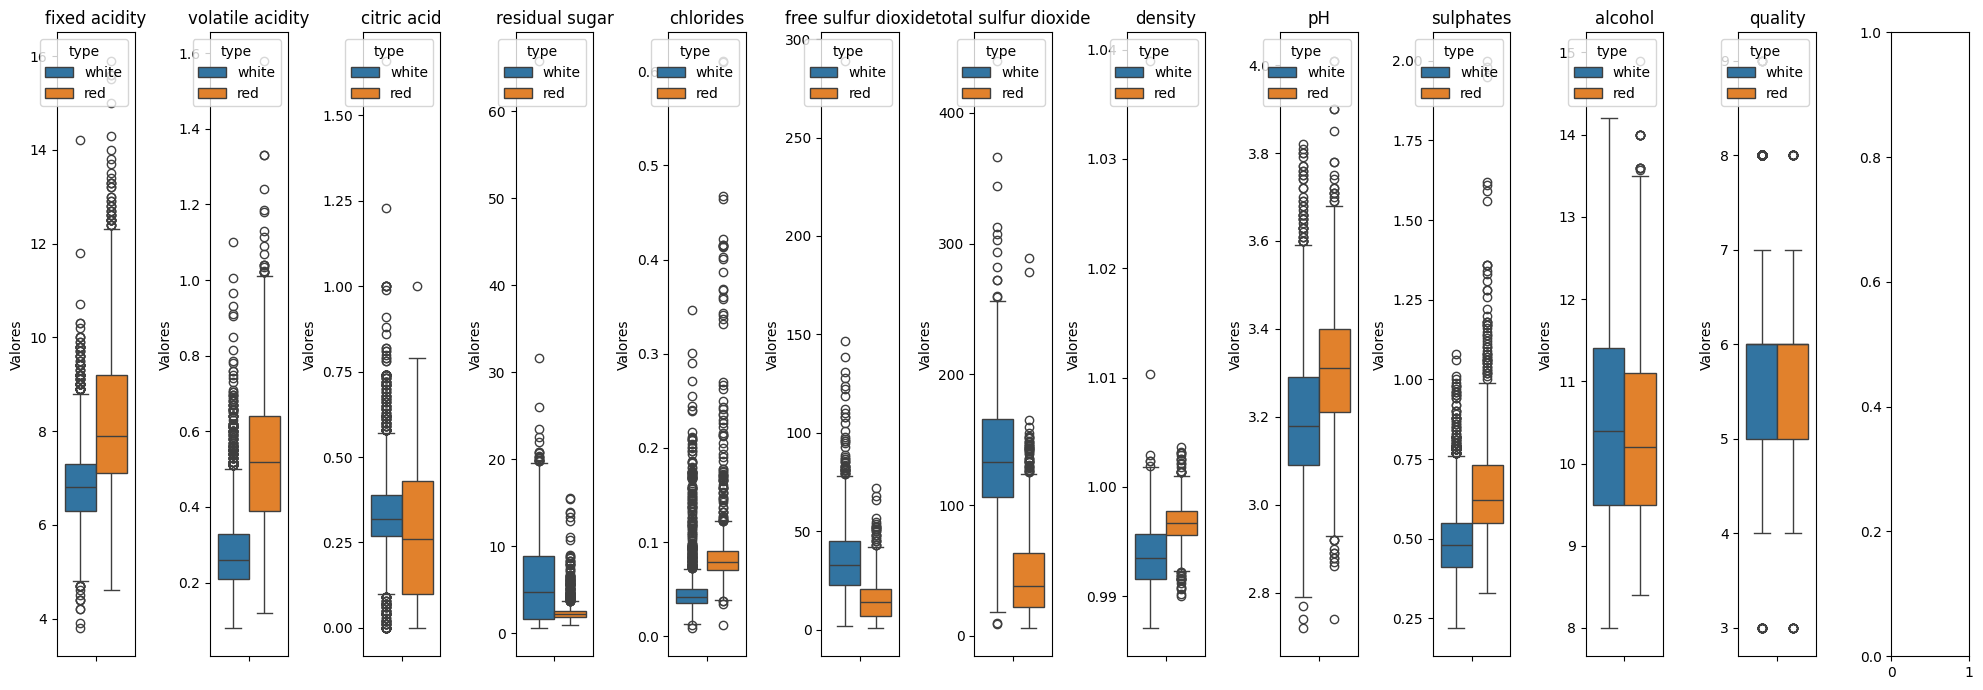

In [19]:
col_plot = [col for col in data.columns if col not in ['type']]

n_cols = len(data.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(20,7))

for i, coluna in enumerate(col_plot):
    sns.boxplot(data=data, y=coluna, ax=axes[i],hue='type')
    axes[i].set_title(coluna)
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Valores')
    
plt.tight_layout()
plt.show()

**Observações importantes:**

- vinhos vermelhos tendem a ter mais acidez fixa e acidez volatil em sua composição, diferente dos vinhos brancos que tendem a ter menos deste componente. 
- os vinhos vermelhos também apresentam uma maior variação na quantidade de acidez cítrica, podemos observar no boxplot que os quartís são mais esparsos, e mesmo apesar de ter uma variação maior, possui menos outliers que o vinho branco neste quesito. Grande parte dos outliers se encontra no vinho branco.
- vinhos brancos possui mais açucar que os vermelhos, a concentração de açucar nos vermelhos é muito baixa.
- o pH dos vinhos estão em uma escala parecida, porém o vinho branco se concentra mais em torno de 3.1 a 3.3, e os vermelhos 3.2 a 3.4, além disso os vermelhos possuem mais outliers com vinhos chegando  até 4 de pH.
- vinhos brancos tem uma variação maior na porcentagem de alcool, o vinho vermelho tem uma variação menor entre 8,5 a 13%.


Feito essa observações nosso próximo passo é tratar esses outliers, e para isso inicialmente utilizaremos o cálculo interquartílico, que é um método estatístico que formula limites superiores e inferiores há um valor com base no seu primeiro e terceiro quartil.

In [35]:
# análise de interferência interquartílica
numeric_col = data.drop(columns='type', axis=1)

data_no_out = data.copy()

for i in numeric_col.columns:
    q1 = data[i].quantile(0.25) # pega o primeiro quartil
    q3 = data[i].quantile(0.75) # prega o terceiro quartil
    
    d = q3 - q1 # calcula a distância entre eles
    dd = d * 1.5 # multiplicador para a distância
    
    limite_superior = q3 + dd # atribui valor superior limite
    limite_inferior = q1 - dd # atribui valor inferior limite
    
    print(f'Coluna {i} -> Limite inferior: {round(limite_inferior, 3)} | Limite superior: {round(limite_superior, 3)}')
    print('_'*80)
    
    data_no_out = data_no_out[(data_no_out[i] >= limite_inferior) & (data_no_out[i] <= limite_superior)] # atribui todos os limites em uma cópia do dataset

Coluna fixed acidity -> Limite inferior: 4.45 | Limite superior: 9.65
________________________________________________________________________________
Coluna volatile acidity -> Limite inferior: -0.04 | Limite superior: 0.68
________________________________________________________________________________
Coluna citric acid -> Limite inferior: -0.0 | Limite superior: 0.64
________________________________________________________________________________
Coluna residual sugar -> Limite inferior: -6.75 | Limite superior: 16.05
________________________________________________________________________________
Coluna chlorides -> Limite inferior: -0.004 | Limite superior: 0.108
________________________________________________________________________________
Coluna free sulfur dioxide -> Limite inferior: -21.5 | Limite superior: 78.5
________________________________________________________________________________
Coluna total sulfur dioxide -> Limite inferior: -46.0 | Limite superior: 274.0
____

#### Analizando as distribuições pós calculo interquartílico

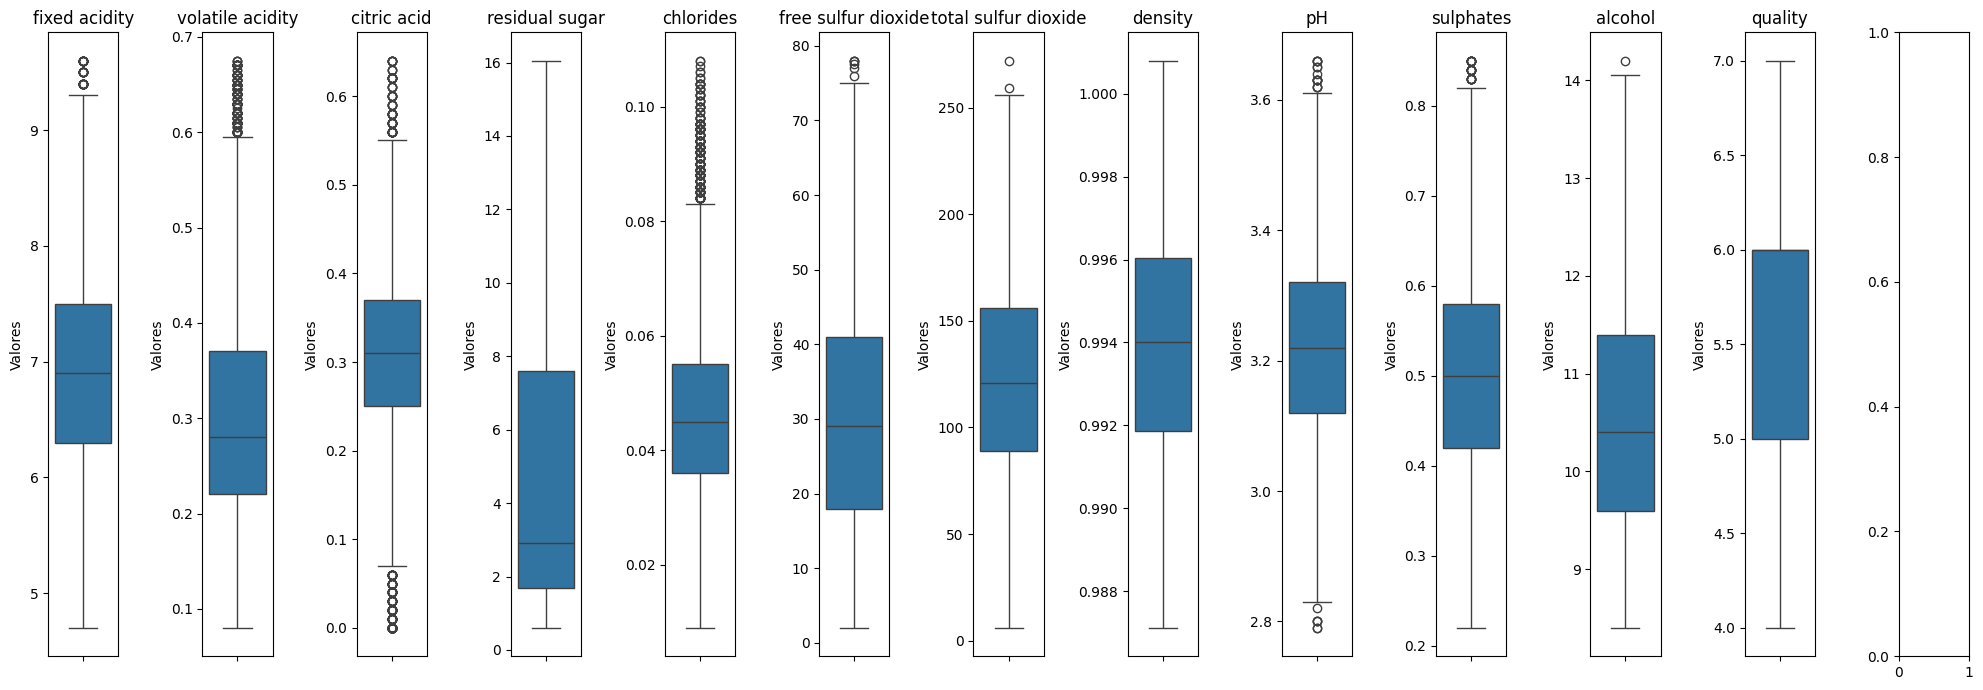

In [38]:
# seleciona as colunas que serão plotadas
col_plot = [col for col in data_no_out.columns if col not in ['type']]

# cria boxplot para cada coluna
n_cols = len(data_no_out.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(20,7))

for i, coluna in enumerate(col_plot):
    sns.boxplot(data=data_no_out, y=coluna, ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Valores')
    
plt.tight_layout()
plt.show()

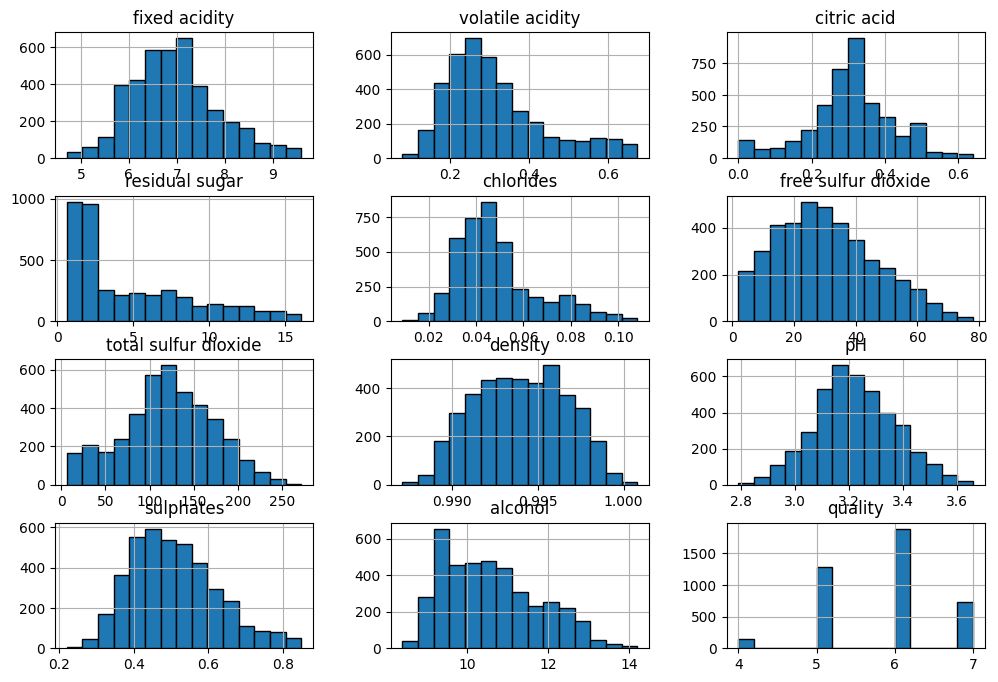

In [41]:
data_no_out.hist(figsize=(12,8), bins=15, edgecolor='black');

- conseguimos notar que a quantidade de outliers reduziu significativamente, mas que ainda há valores extremos mesmo após noosso método.
- a distribuição no histograma também ficou mais próximo a uma distribuição normal em algumas colunas.
